In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
dim = 7

def h(x, deg):
    pows = np.zeros(deg+1)
    for i in range(deg+1):
        pows[i] = pow(x, i)
    return pows


def H(Xtrain, deg):
    N = Xtrain.shape[0]
    X = np.empty((N, deg+1))
    for i in range(N):
        X[i] = h(Xtrain[i], deg)
    return X


def beta(HX, Y):
    assert Y.shape[1] == 1
    return np.matmul(np.linalg.inv(np.matmul(HX.T, HX)), np.matmul(HX.T, Y))


def fhat(x, Xtrain, Ytrain, deg):
    xhat = h(x, deg)
    b = beta(H(Xtrain, deg), Ytrain)
    return np.matmul(xhat, b)[0]  # the matmul returns a 1x1 array

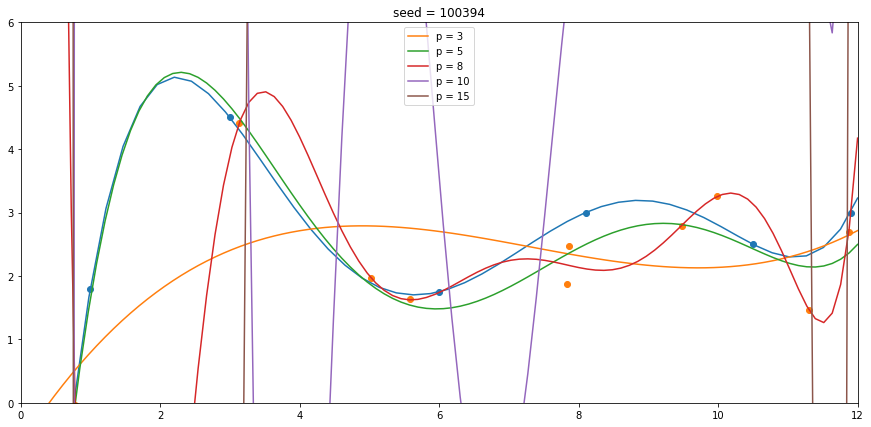

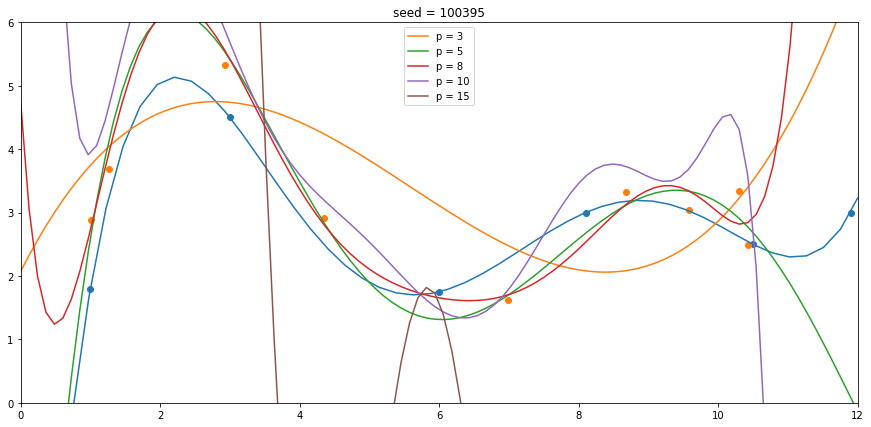

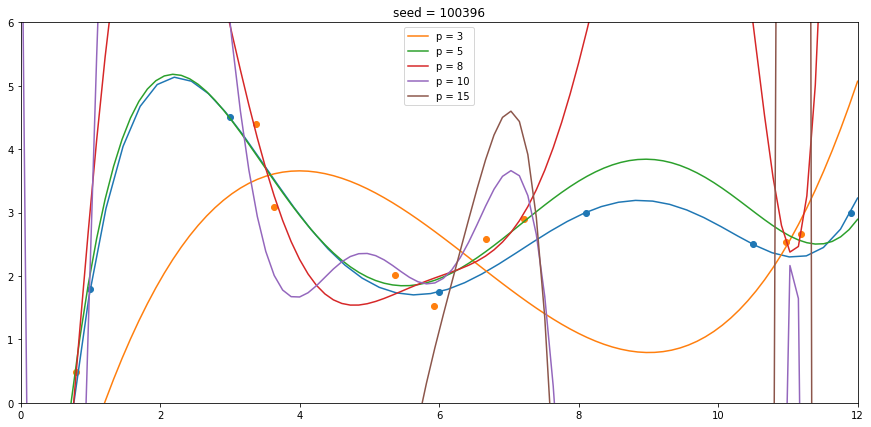

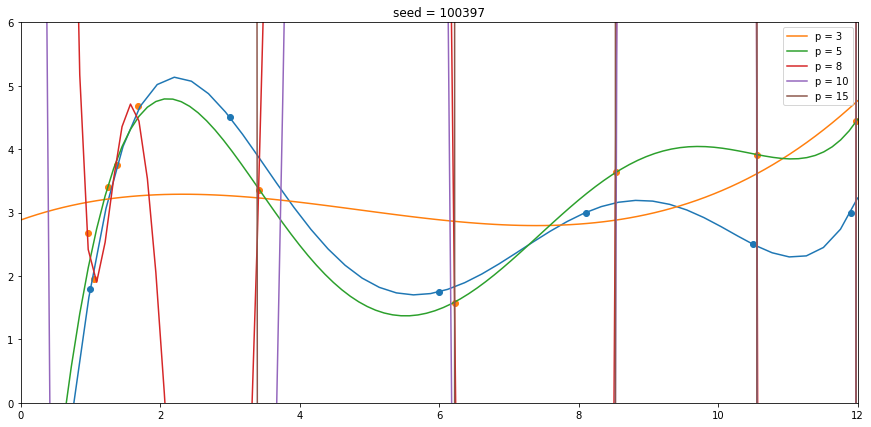

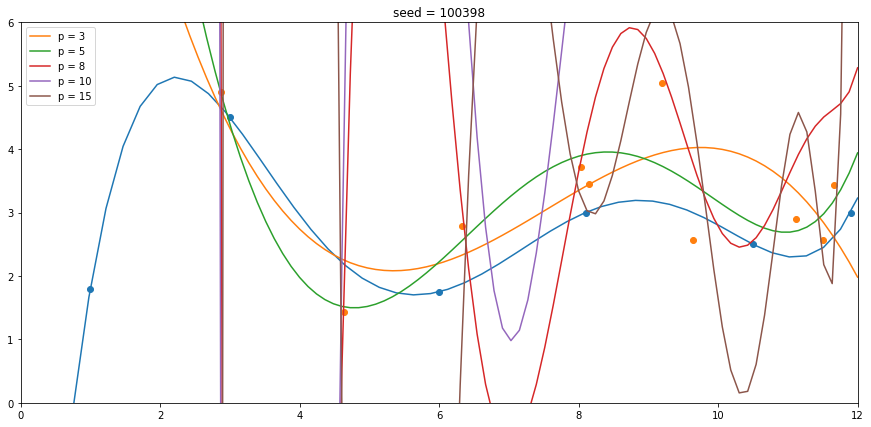

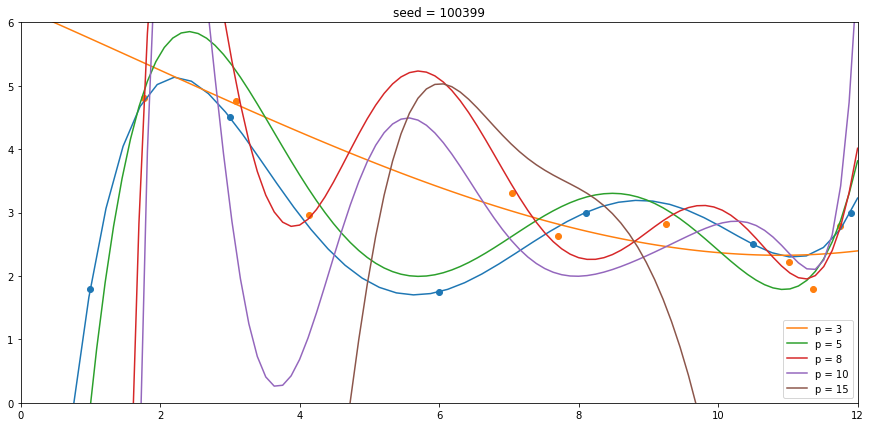

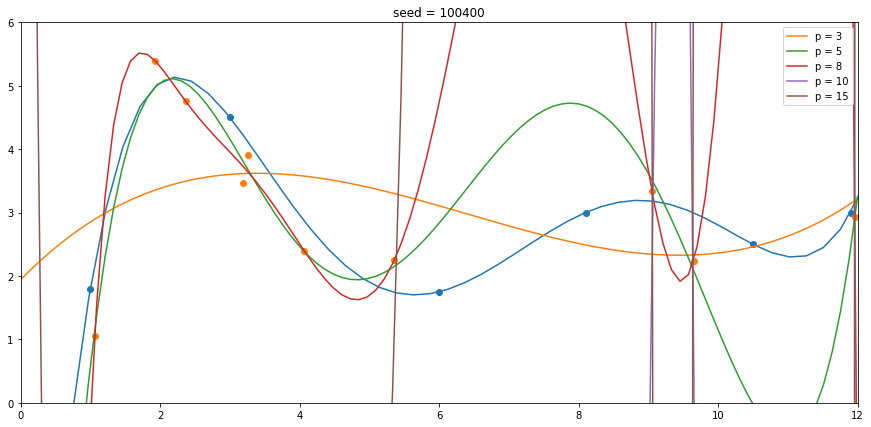

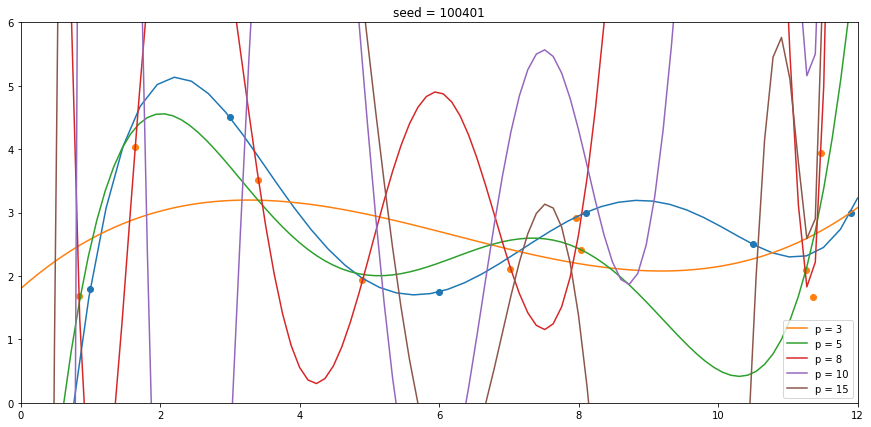

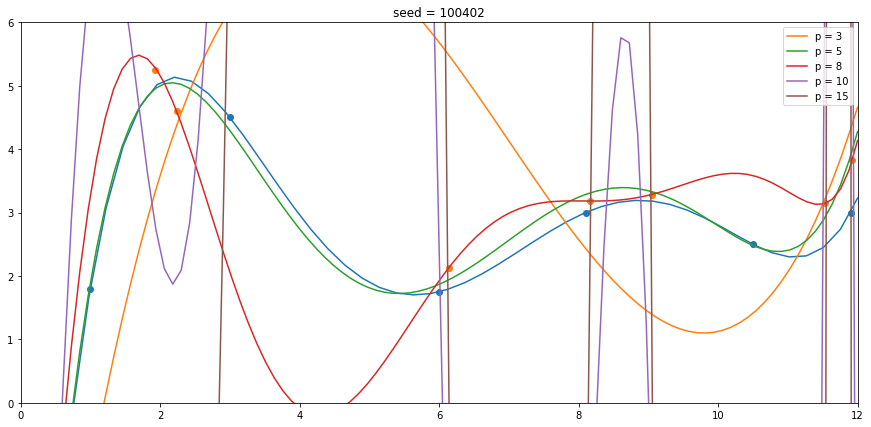

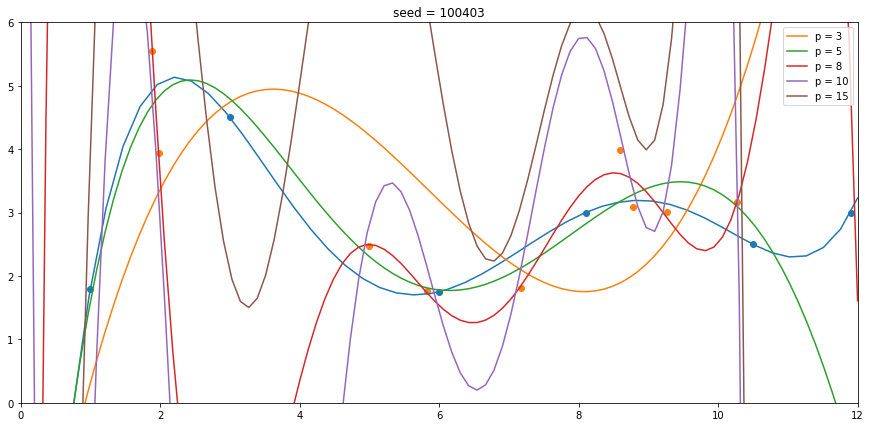

In [13]:
# GENERATE NEW 5deg function

# good seeds
# 100319
# 100358

dim = 5

def RSS(y, yhat):
    return np.linalg.norm(y - yhat)


for k in range(0, 10):
    plt.figure(figsize=(15, 7))
    X_MIN, X_MAX = 0, 12
    Y_MIN, Y_MAX = 0, 6

    XTRUE = np.array([1., 3.0, 6.0, 8.1, 10.5, 11.9])
    YTRUE = np.array([1.8, 4.5, 1.75, 3.0, 2.5, 3.0])

    plt.scatter(XTRUE, YTRUE)

    xlin = np.linspace(X_MIN, X_MAX)
    ys = np.zeros(xlin.shape[0])
    for i, x in enumerate(xlin):
        ys[i] = fhat(x, XTRUE, YTRUE[np.newaxis].T, dim)

    plt.xlim(X_MIN, X_MAX)
    plt.ylim(Y_MIN, Y_MAX)
    plt.plot(xlin, ys)

    seed = 100394 + k
    N = 10
    np.random.seed(seed)
    xs = np.random.uniform(X_MIN, X_MAX, N)
    ys = np.zeros(N)
    for i, x in enumerate(xs):
        ys[i] = fhat(x, XTRUE, YTRUE[np.newaxis].T, dim) + np.random.normal(0, .6)
    plt.scatter(xs, ys)

    for j in [3, 5, 8, 10, 15]:
        xhat = np.linspace(0, 12, num=100)
        yhat = np.zeros(xhat.shape[0])
        for i, x in enumerate(xhat):
            yhat[i] = fhat(x, xs, ys[np.newaxis].T, j)

        plt.plot(xhat, yhat, label="p = %d" % j)

    plt.legend()
    plt.title("seed = %d" % (seed))

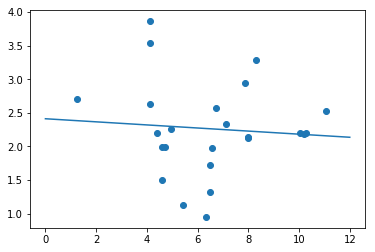

In [304]:
XS = np.array([ 6.57105191,  7.11776457, 10.17884278,  4.59789359,  7.99096752,  7.88123594,
  10.26644373,  6.4922343,   4.11270326, 10.03495831,  4.59490179,
  1.23438635,  6.7212739,   7.97767193,  5.4133233,   4.7051394,   6.50585919,
  4.9443614,   4.40869865,  4.13761615, 11.05155742,  8.28318306,  4.11137538,
  6.34320998])
YS = np.array([[ 1.98275502],
 [ 2.32712617],
 [ 2.18893322],
 [ 1.99887523],
 [ 2.14243874],
 [ 2.94527136],
 [ 2.19656407],
 [ 1.72388191],
 [ 2.62856256],
 [ 2.20730773],
 [ 1.49648632],
 [ 2.7083095 ],
 [ 2.57154572],
 [ 2.12738137],
 [ 1.13007257],
 [ 1.99614293],
 [ 1.3232422 ],
 [ 2.26217284],
 [ 2.20132978],
 [ 3.86299031],
 [ 2.52630299],
 [ 3.28839233],
 [ 3.53691861],
 [ 0.95169232]])

A = np.vstack([XS, np.ones(len(XS))]).T
m, c = np.linalg.lstsq(A, YS, rcond=None)[0]
m,c
plt.scatter(XS, YS, marker='o')
plt.plot(np.linspace(0, 12), m * np.linspace(0, 12) + c)